Nutritional Fact Analysis of Coffee Shop Menu

The management of the coffee shop realized that its customers are becoming increasingly health-conscious and therefore, they decided to mark the low-calorie beverages and the healthier options with a special symbol so that the customers can identify them easily.

For instance, one of the popular hypotheses in the management board is that they would want to mark the beverages that use low-fat milk as ‘healthy’ or ‘heart-healthy’ because they presume that it would have fewer calories and lower total fat than the whole milk alternatives.

Similarly, they would want to know beverages are high in protein, high in fat, etc. So that special marketing effort can be planned around them.

For this analysis, the nutritional facts such as calories, total fat, trans fat, saturated fat, sugars, cholesterol, and protein are recorded for more than 30 Beverages on the menu. The facts are organized considering different choices of size and milk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.formula.api as smf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Analyze the nutritional fact of the coffee shop menu items.There are Three Type of Analysis.



In [3]:
Shop = pd.read_csv('CoffeeShopMenu.csv')
Shop

,Category,Beverage,Size,Milk,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
0,Coffee,Brewed Coffee,Short,None,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,Coffee,Brewed Coffee,Tall,None,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,Coffee,Brewed Coffee,Grande,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
3,Coffee,Brewed Coffee,Venti,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
4,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Whole Milk,260,4.0,2.0,0.1,10,190,53,0,52,4.0
234,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Soymilk,240,2.0,0.2,0.0,0,180,51,1,49,3.0
235,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Nonfat Milk,310,0.2,0.1,0.0,5,260,70,0,69,6.0
236,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0


Exploratory Data Analysis :- 
Generate as many insights as possible on which beverage category, beverage, milk types are high and low on calories, fat, protein, carbs, sugar, and dietary fiber, etc.

In [8]:
Shop.shape

(238, 14)

In [9]:
Shop.info

<bound method DataFrame.info of                       Category                                      Beverage  \
0                       Coffee                                 Brewed Coffee   
1                       Coffee                                 Brewed Coffee   
2                       Coffee                                 Brewed Coffee   
3                       Coffee                                 Brewed Coffee   
4      Classic Espresso Drinks                                   Caffe Latte   
..                         ...                                           ...   
233  Frappuccino Blended Creme  Strawberries & Creme (Without Whipped Cream)   
234  Frappuccino Blended Creme  Strawberries & Creme (Without Whipped Cream)   
235  Frappuccino Blended Creme  Strawberries & Creme (Without Whipped Cream)   
236  Frappuccino Blended Creme  Strawberries & Creme (Without Whipped Cream)   
237  Frappuccino Blended Creme  Strawberries & Creme (Without Whipped Cream)   

       

In [17]:
Unique_Category = Shop.Category.unique()
len('Unique_Category')

15

In [11]:
Shop.describe()

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,193.810924,2.931933,1.318908,0.037815,6.407563,128.067227,35.878151,0.815126,32.819328,7.032773
std,103.668135,2.956133,1.648097,0.071737,8.679348,82.656396,20.927388,1.455189,19.838082,4.893173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,120.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [9]:
Shop.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,238.0,193.810924,103.668135,0.0,120.0,185.0,260.00,510.0
TotalFat,238.0,2.931933,2.956133,0.0,0.2,2.5,4.50,15.0
TransFat,238.0,1.318908,1.648097,0.0,0.1,0.5,2.00,9.0
SaturatedFat,238.0,0.037815,0.071737,0.0,0.0,0.0,0.10,0.3
Sodium,238.0,6.407563,8.679348,0.0,0.0,5.0,10.00,40.0
TotalCarb,238.0,128.067227,82.656396,0.0,70.0,120.0,170.00,340.0
Cholesterol,238.0,35.878151,20.927388,0.0,21.0,34.0,50.75,90.0
DietaryFibre,238.0,0.815126,1.455189,0.0,0.0,0.0,1.00,8.0
Sugars,238.0,32.819328,19.838082,0.0,18.0,32.0,43.75,84.0
Protein,238.0,7.032773,4.893173,0.0,3.0,6.0,10.00,20.0


In [16]:
Shop.corr()

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Calories,1.000000,0.636476,0.645691,0.332305,0.388229,0.796933,0.940820,0.386000,0.911007,0.581001
TotalFat,0.636476,1.000000,0.889677,0.618044,0.585912,0.460300,0.379539,0.257285,0.338384,0.549996
TransFat,0.645691,0.889677,1.000000,0.693413,0.706656,0.533636,0.445614,0.129895,0.426742,0.496012
SaturatedFat,0.332305,0.618044,0.693413,1.000000,0.920493,0.242933,0.164689,-0.094424,0.182713,0.288548
Sodium,0.388229,0.585912,0.706656,0.920493,1.000000,0.294795,0.201423,-0.061158,0.208555,0.496262
TotalCarb,0.796933,0.460300,0.533636,0.242933,0.294795,1.000000,0.765836,0.178905,0.770051,0.419695
Cholesterol,0.940820,0.379539,0.445614,0.164689,0.201423,0.765836,1.000000,0.346333,0.984227,0.365335
DietaryFibre,0.386000,0.257285,0.129895,-0.094424,-0.061158,0.178905,0.346333,1.000000,0.188848,0.539622
Sugars,0.911007,0.338384,0.426742,0.182713,0.208555,0.770051,0.984227,0.188848,1.000000,0.268728
Protein,0.581001,0.549996,0.496012,0.288548,0.496262,0.419695,0.365335,0.539622,0.268728,1.000000


<AxesSubplot:xlabel='Calories', ylabel='Density'>

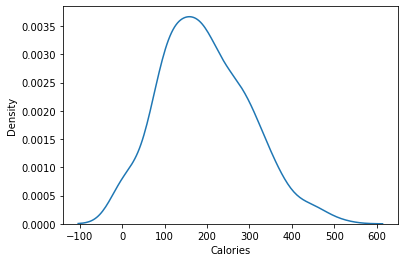

In [10]:
sns.kdeplot(Shop.Calories)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

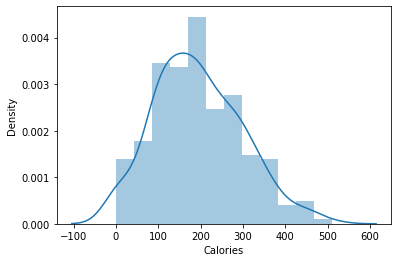

In [13]:
sns.distplot(Shop.Calories)

In [20]:
objnames = Shop.dtypes[Shop.dtypes == 'object'].index
objnames

Index(['Category', 'Beverage', 'Size', 'Milk'], dtype='object')

In [23]:
numericnames = Shop.dtypes[Shop.dtypes!='object'].index
numericnames

Index(['Calories', 'TotalFat', 'TransFat', 'SaturatedFat', 'Sodium',
       'TotalCarb', 'Cholesterol', 'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

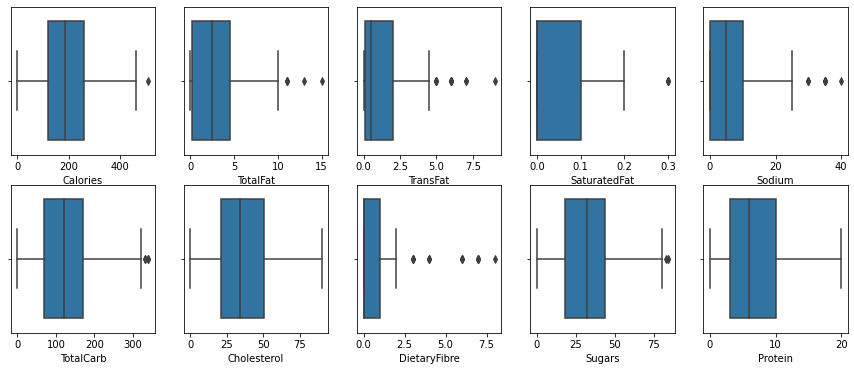

In [46]:
plt.figure(figsize=(15,6))
count = 1
for i in numericnames:
    plt.subplot(2,5,count)
    sns.boxplot(Shop.loc[:,i])
    count = count + 1

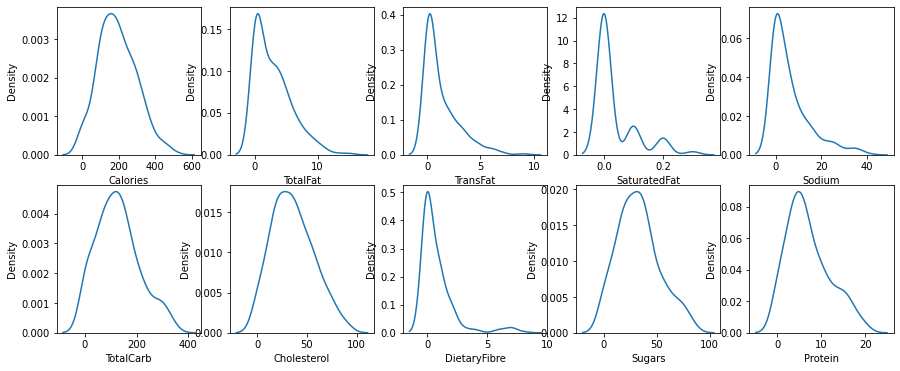

In [45]:
plt.figure(figsize=(15,6))
count = 1
for i in numericnames:
    plt.subplot(2,5,count)
    sns.kdeplot(Shop.loc[:,i])
    count = count + 1

How much Colories in Beverages.??

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Beverage'>

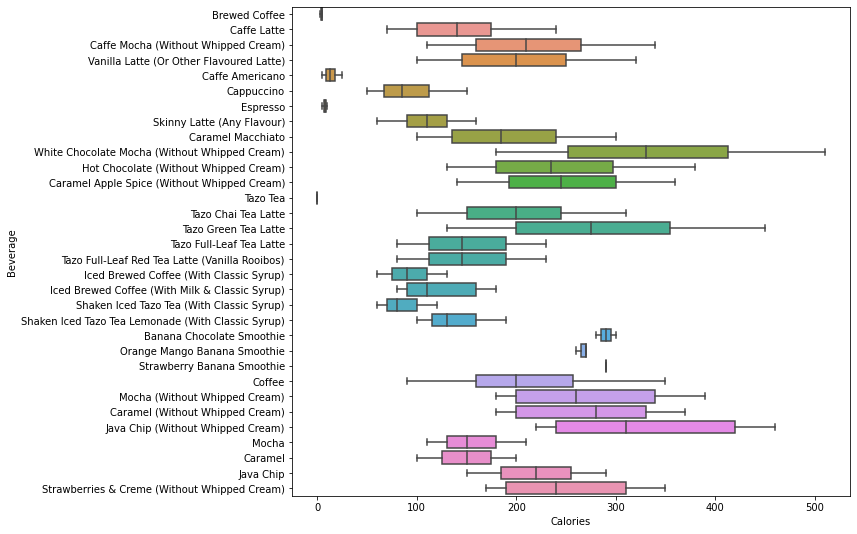

In [48]:
plt.figure(figsize=(10,9))
sns.boxplot(Shop.Calories,Shop.Beverage)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Category'>

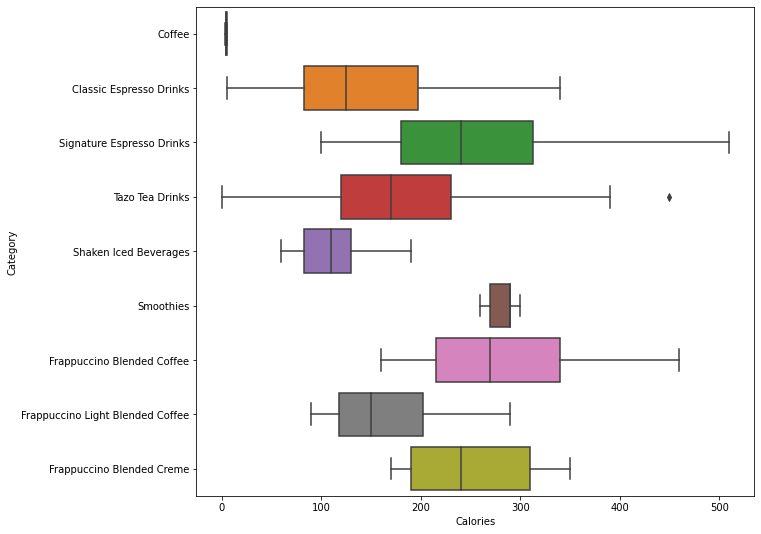

In [57]:
plt.figure(figsize=(10,9))
sns.boxplot(Shop.Calories, Shop.Category)

In [65]:
Shop.corr()

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Calories,1.000000,0.636476,0.645691,0.332305,0.388229,0.796933,0.940820,0.386000,0.911007,0.581001
TotalFat,0.636476,1.000000,0.889677,0.618044,0.585912,0.460300,0.379539,0.257285,0.338384,0.549996
TransFat,0.645691,0.889677,1.000000,0.693413,0.706656,0.533636,0.445614,0.129895,0.426742,0.496012
SaturatedFat,0.332305,0.618044,0.693413,1.000000,0.920493,0.242933,0.164689,-0.094424,0.182713,0.288548
Sodium,0.388229,0.585912,0.706656,0.920493,1.000000,0.294795,0.201423,-0.061158,0.208555,0.496262
TotalCarb,0.796933,0.460300,0.533636,0.242933,0.294795,1.000000,0.765836,0.178905,0.770051,0.419695
Cholesterol,0.940820,0.379539,0.445614,0.164689,0.201423,0.765836,1.000000,0.346333,0.984227,0.365335
DietaryFibre,0.386000,0.257285,0.129895,-0.094424,-0.061158,0.178905,0.346333,1.000000,0.188848,0.539622
Sugars,0.911007,0.338384,0.426742,0.182713,0.208555,0.770051,0.984227,0.188848,1.000000,0.268728
Protein,0.581001,0.549996,0.496012,0.288548,0.496262,0.419695,0.365335,0.539622,0.268728,1.000000


<AxesSubplot:>

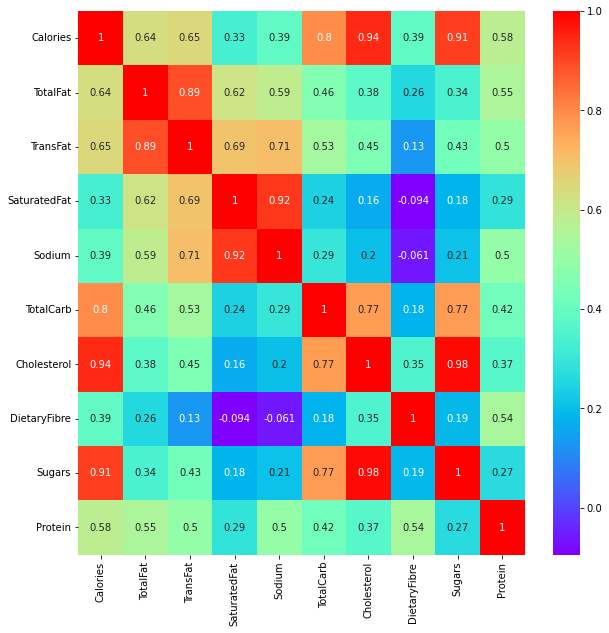

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(Shop.corr(),annot = True,cmap='rainbow')

In [70]:
Shop.Milk.value_counts()

Nonfat Milk    81
Soymilk        65
2% Milk        50
None           27
Whole Milk     15
Name: Milk, dtype: int64

In [71]:
Shop.Category.value_counts()

Classic Espresso Drinks             58
Tazo Tea Drinks                     52
Signature Espresso Drinks           40
Frappuccino Blended Coffee          36
Shaken Iced Beverages               18
Frappuccino Light Blended Coffee    12
Smoothies                            9
Frappuccino Blended Creme            9
Coffee                               4
Name: Category, dtype: int64

In [72]:
Shop.Size.value_counts()

Grande    72
Tall      63
Venti     63
Short     38
Single     1
Double     1
Name: Size, dtype: int64

In [13]:
Shop.Beverage.value_counts()

Tazo Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
Caffe Latte                                           12
Caffe Mocha (Without Whipped Cream)                   12
Vanilla Latte (Or Other Flavoured Latte)              12
Cappuccino                                            12
Caramel Macchiato                                     12
White Chocolate Mocha (Without Whipped Cream)         12
Hot Chocolate (Without Whipped Cream)                 12
Coffee                                                12
Tazo Chai Tea Latte                                   12
Tazo Green Tea Latte                                  12
Tazo Full-Leaf Tea Latte                              12
Java Chip (Without Whipped Cream)                      9
Caramel (Without Whipped Cream)                        9
Mocha (Without Whipped Cream)                          9
Iced Brewed Coffee (With Milk & Classic Syrup)         9
Strawberries & Creme (Without Whipped Cream)           9
Tazo Tea                       

In [75]:
Shop.groupby('Category').mean().sort_values('Category',ascending = True)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692


In [78]:
Shop.groupby('Category').mean().sort_values('Protein',ascending = False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [79]:
pd.pivot_table(data=Shop,values='Calories',index='Category',columns='Milk',aggfunc='mean')

Milk,2% Milk,None,Nonfat Milk,Soymilk,Whole Milk
Category,,,,,
Classic Espresso Drinks,184.375000,11.666667,134.500000,151.250000,NaN
Coffee,NaN,4.250000,NaN,NaN,NaN
Frappuccino Blended Coffee,NaN,NaN,267.500000,268.333333,295.000000
Frappuccino Blended Creme,NaN,NaN,236.666667,243.333333,266.666667
Frappuccino Light Blended Coffee,NaN,NaN,162.500000,NaN,NaN
Shaken Iced Beverages,130.000000,106.666667,116.666667,120.000000,NaN
Signature Espresso Drinks,275.833333,247.500000,233.333333,241.666667,NaN
Smoothies,286.666667,NaN,276.666667,283.333333,NaN
Tazo Tea Drinks,211.875000,0.000000,175.625000,188.750000,NaN


Hypothesis testing :- ANOVA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Milk'>

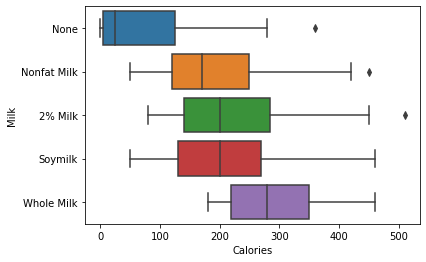

In [80]:
sns.boxplot(Shop.Calories,Shop.Milk)

In [84]:
Shop.groupby('Milk').describe()

Calories                                                     \
               count        mean        std    min    25%    50%    75%   
Milk                                                                      
2% Milk         50.0  218.000000  98.850537   80.0  140.0  200.0  285.0   
None            27.0   75.444444  95.110193    0.0    5.0   25.0  125.0   
Nonfat Milk     81.0  189.506173  88.046880   50.0  120.0  170.0  250.0   
Soymilk         65.0  207.692308  93.135809   50.0  130.0  200.0  270.0   
Whole Milk      15.0  289.333333  84.216275  180.0  220.0  280.0  350.0   

                   TotalFat            ... Sugars       Protein            \
               max    count      mean  ...    75%   max   count      mean   
Milk                                   ...                                  
2% Milk      510.0     50.0  5.520000  ...   40.0  74.0    50.0  9.620000   
None         360.0     27.0  0.022222  ...   31.0  83.0    27.0  0.325926   
Nonfat Milk  450.0     81.0  1.049383  ...   44.0  84.0    81.0  8.061728   
Soymilk      460.0     65.0  4.103077  ...   42.0  80.0    65.0  7.184615   
Whole Milk   460.0     15.0  4.633333  ...   68.5  84.0    15.0  4.266667   

                                                   
                  std  min  25%  50%    75%   max  
Milk                                               
2% Milk      4.685584  2.0  6.0  9.0  13.00  20.0  
None         0.397678  0.0  0.0  0.1   0.45   1.0  
Nonfat Milk  4.632347  2.0  4.0  7.0  11.00  20.0  
Soymilk      4.149143  2.0  4.0  6.0   9.00  19.0  
Whole Milk   1.334523  3.0  3.0  4.0   5.00   7.0  

[5 rows x 80 columns]

In [94]:
formula = 'Calories ~ Milk'
model = ols(formula = formula,data = Shop).fit()
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
Milk,4.0,5.584364e+05,139609.099632,16.357517,7.975236e-12
Residual,233.0,1.988622e+06,8534.858769,NaN,NaN


In [95]:
Shop_new = Shop[Shop.Milk!= 'None']
Shop.shape ,Shop_new.shape

((238, 14), (211, 14))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories', ylabel='Milk'>

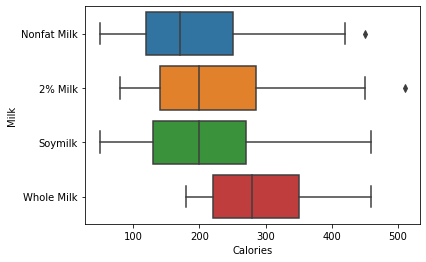

In [96]:
sns.boxplot(Shop_new.Calories,Shop_new.Milk)

In [99]:
formula = 'Calories ~ Milk'
model = ols(formula = formula,data = Shop_new).fit()
table = anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
Milk,3.0,1.317432e+05,43914.396571,5.184292,0.001789
Residual,207.0,1.753427e+06,8470.663896,NaN,NaN


Linear Regression :-

In [91]:
Shop.columns

Index(['Category', 'Beverage', 'Size', 'Milk', 'Calories', 'TotalFat',
       'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol',
       'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

In [93]:
formula = 'Calories ~ Category + Beverage + Size + Milk + TotalFat + Cholesterol + TotalCarb + Sodium + SaturatedFat + DietaryFibre + Sugars + Protein'
lm = smf.ols(formula = formula, data = Shop).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2722.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.36e-245
Time:                        17:24:36   Log-Likelihood:                -666.67
No. Observations:                 238   AIC:                             1429.
Df Residuals:                     190   BIC:                             1596.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [104]:
formula = 'Calories ~  TotalFat + Sugars + Protein'
lm = smf.ols(formula = formula, data = Shop).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     9152.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.42e-242
Time:                        17:44:26   Log-Likelihood:                -873.77
No. Observations:                 238   AIC:                             1756.
Df Residuals:                     234   BIC:                             1769.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7872      1.365      1.309      0.1

In [106]:
pred = lm.predict(Shop)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories'>

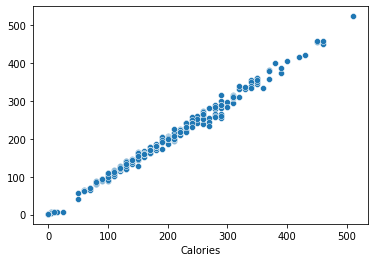

In [107]:
sns.scatterplot(Shop.Calories,pred)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories'>

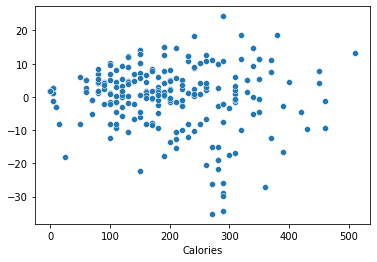

In [108]:
sns.scatterplot(Shop.Calories,pred-Shop.Calories)

<AxesSubplot:ylabel='Density'>

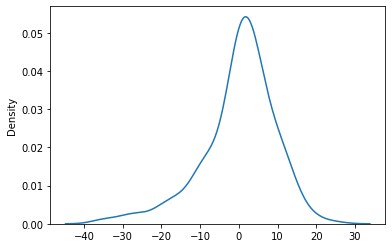

In [109]:
sns.kdeplot(pred -Shop.Calories)

Final Result:-